In [28]:
# Import Dependencies
import os
import pandas as pd
import requests
import json
import pprint
from config import (aqs_api_key)
from config import (email_address)
import matplotlib.pyplot as plt
import numpy as np

# https://aqs.epa.gov/aqsweb/documents/data_api.html#signup for api information
pp = pprint.PrettyPrinter(indent = 4)
states_url = "https://aqs.epa.gov/data/api/list/states"
parameters_url = "https://aqs.epa.gov/data/api/list/classes"
sample_data_url = "https://aqs.epa.gov/data/api/dailyData/byState"
p1 = {"email" : email_address, "key" : aqs_api_key}

# States to be used and their ID Codes, All in top 10 for worst congestion and traffic
California = "06"
Hawaii = "15"
District_of_Columbia = "11"
New_York = "36"
Massachusetts = "25"

cali_data = []
hawaii_data = []
ny_data = []
dc_data = []
mass_data = []

In [23]:
# Create a DataFrame for New York and pull carbon monoxide data from API
ny_params = {"email" : email_address, "key" : aqs_api_key, "param" : "44201", 
          "bdate" : "20190101", "edate" : "20191231", "state" : New_York}

# Call to url
ny_response = requests.get(sample_data_url, params = ny_params).json()
ny_data.append(ny_response)

ny_df = pd.DataFrame(ny_data[0]["Data"])
ny_df.head()
#ny_df.to_csv('NY_data.csv')

,state_code,county_code,site_number,parameter_code,poc,latitude,longitude,datum,parameter,sample_duration,...,method_code,method,local_site_name,site_address,state,county,city,cbsa_code,cbsa,date_of_last_change
0,36,063,1006,44201,1,43.22386,-78.47888,WGS84,Ozone,1 HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,MIDDLEPORT,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,15380,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
1,36,063,1006,44201,1,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,MIDDLEPORT,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,15380,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
2,36,063,1006,44201,1,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,MIDDLEPORT,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,15380,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
3,36,063,1006,44201,1,43.22386,-78.47888,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,MIDDLEPORT,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,15380,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
4,36,063,1006,44201,1,43.22386,-78.47888,WGS84,Ozone,1 HOUR,...,087,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,MIDDLEPORT,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,15380,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12


In [24]:
cleanNY_df = ny_df.drop(["parameter_code","datum","cbsa_code","poc","method_code","local_site_name","event_type","validity_indicator","method_code"], axis=1)

cleanNY_df.head()

,state_code,county_code,site_number,latitude,longitude,parameter,sample_duration,pollutant_standard,date_local,units_of_measure,...,first_max_value,first_max_hour,aqi,method,site_address,state,county,city,cbsa,date_of_last_change
0,36,063,1006,43.22386,-78.47888,Ozone,1 HOUR,Ozone 1-hour 1979,2019-01-01,Parts per million,...,0.032,21,NaN,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
1,36,063,1006,43.22386,-78.47888,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 1997,2019-01-01,Parts per million,...,0.030,19,28.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
2,36,063,1006,43.22386,-78.47888,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 2008,2019-01-01,Parts per million,...,0.030,19,28.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
3,36,063,1006,43.22386,-78.47888,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2019-01-01,Parts per million,...,0.030,19,28.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
4,36,063,1006,43.22386,-78.47888,Ozone,1 HOUR,Ozone 1-hour 1979,2019-01-02,Parts per million,...,0.031,3,NaN,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12


In [25]:
NY8hour_df = cleanNY_df.loc[cleanNY_df["sample_duration"] == "8-HR RUN AVG BEGIN HOUR"]
NY8hour_df

,state_code,county_code,site_number,latitude,longitude,parameter,sample_duration,pollutant_standard,date_local,units_of_measure,...,first_max_value,first_max_hour,aqi,method,site_address,state,county,city,cbsa,date_of_last_change
1,36,063,1006,43.223860,-78.478880,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 1997,2019-01-01,Parts per million,...,0.030,19,28.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
2,36,063,1006,43.223860,-78.478880,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 2008,2019-01-01,Parts per million,...,0.030,19,28.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
3,36,063,1006,43.223860,-78.478880,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2019-01-01,Parts per million,...,0.030,19,28.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
5,36,063,1006,43.223860,-78.478880,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 1997,2019-01-02,Parts per million,...,0.029,0,27.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
6,36,063,1006,43.223860,-78.478880,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 2008,2019-01-02,Parts per million,...,0.029,0,27.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,"MIDDLEPORT STP, 3825 NORTH HARTLAND RD",New York,Niagara,Middleport,"Buffalo-Cheektowaga-Niagara Falls, NY",2020-02-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39715,36,103,0044,40.961017,-73.139046,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 2008,2019-11-02,Parts per million,...,0.031,9,29.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,15 Shore Dr. Setauket-East Setauket NY 11733,New York,Suffolk,Old Field,"New York-Newark-Jersey City, NY-NJ-PA",2020-05-22
39716,36,103,0044,40.961017,-73.139046,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-hour 2015,2019-11-02,Parts per million,...,0.031,9,29.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,15 Shore Dr. Setauket-East Setauket NY 11733,New York,Suffolk,Old Field,"New York-Newark-Jersey City, NY-NJ-PA",2020-05-22
39718,36,103,0044,40.961017,-73.139046,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 1997,2019-11-03,Parts per million,...,0.033,8,31.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,15 Shore Dr. Setauket-East Setauket NY 11733,New York,Suffolk,Old Field,"New York-Newark-Jersey City, NY-NJ-PA",2020-05-22
39719,36,103,0044,40.961017,-73.139046,Ozone,8-HR RUN AVG BEGIN HOUR,Ozone 8-Hour 2008,2019-11-03,Parts per million,...,0.033,8,31.0,INSTRUMENTAL - ULTRA VIOLET ABSORPTION,15 Shore Dr. Setauket-East Setauket NY 11733,New York,Suffolk,Old Field,"New York-Newark-Jersey City, NY-NJ-PA",2020-05-22


In [26]:
countyaqiNY = NY8hour_df.groupby(["county"])["aqi"].mean().reset_index()
countyaqiNY

,county,aqi
0,Albany,33.777108
1,Bronx,34.798303
2,Chautauqua,38.278443
3,Dutchess,35.372745
4,Erie,36.312437
5,Essex,36.340059
6,Hamilton,34.570281
7,Herkimer,29.111307
8,Jefferson,34.815217
9,Monroe,33.467907


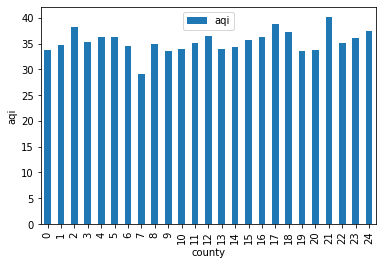

<Figure size 432x288 with 0 Axes>

In [30]:
aqi_chart = countyaqiNY.plot(kind='bar')
aqi_chart.set_xlabel("county")
aqi_chart.set_ylabel("aqi")


plt.show()
plt.tight_layout()

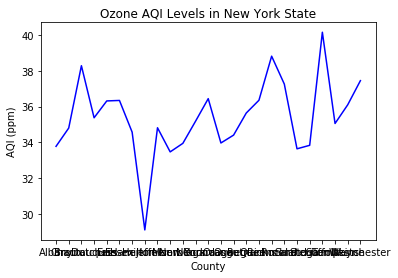

In [33]:
County = countyaqiNY["county"]
AQI = countyaqiNY["aqi"]
plt.title("Ozone AQI Levels in New York State")
plt.xlabel("County")
plt.ylabel('AQI (ppm)')
aqibydate, = plt.plot(County, AQI, color="blue", label="Ozone AQI Levels in New York State")
plt.show()

In [13]:
countymaxhourNY = NY8hour_df.groupby(["county"])["first_max_hour"].mean().reset_index()
countymaxhourNY

,county,first_max_hour
0,Albany,10.267068
1,Bronx,10.492761
2,Chautauqua,10.933134
3,Dutchess,10.067134
4,Erie,10.579373
5,Essex,10.978197
6,Hamilton,9.889558
7,Herkimer,9.399293
8,Jefferson,10.274845
9,Monroe,10.462326


In [14]:
NYbydate_df = NY8hour_df.groupby(["date_local"])["first_max_hour"].mean().reset_index()
NYbydate_df

,date_local,first_max_hour
0,2019-01-01,15.102564
1,2019-01-02,6.717949
2,2019-01-03,12.128205
3,2019-01-04,11.269231
4,2019-01-05,12.064103
...,...,...
360,2019-12-27,14.333333
361,2019-12-28,9.500000
362,2019-12-29,14.888889
363,2019-12-30,13.666667


In [15]:
aqibydate_df = NY8hour_df.groupby(["date_local"])["aqi"].mean().reset_index()
aqibydate_df

,date_local,aqi
0,2019-01-01,26.102564
1,2019-01-02,24.756410
2,2019-01-03,23.397436
3,2019-01-04,21.576923
4,2019-01-05,22.602564
...,...,...
360,2019-12-27,23.000000
361,2019-12-28,24.166667
362,2019-12-29,21.388889
363,2019-12-30,26.000000


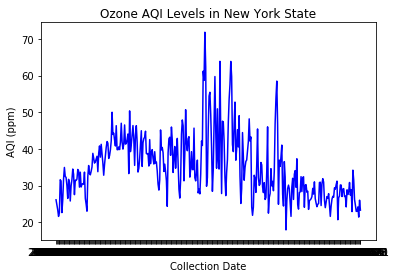

In [31]:
Time = aqibydate_df["date_local"]
AQI = aqibydate_df["aqi"]
plt.title("Ozone AQI Levels in New York State")
plt.xlabel("Collection Date")
plt.ylabel('AQI (ppm)')
aqibydate, = plt.plot(Time, AQI, color="blue", label="Ozone AQI Levels in New York State")
plt.show()

In [18]:
combinedNYdate = NYbydate_df.merge(aqibydate_df, how='inner', on=['date_local'])
combinedNYdate

,date_local,first_max_hour,aqi
0,2019-01-01,15.102564,26.102564
1,2019-01-02,6.717949,24.756410
2,2019-01-03,12.128205,23.397436
3,2019-01-04,11.269231,21.576923
4,2019-01-05,12.064103,22.602564
...,...,...,...
360,2019-12-27,14.333333,23.000000
361,2019-12-28,9.500000,24.166667
362,2019-12-29,14.888889,21.388889
363,2019-12-30,13.666667,26.000000
